A recommendation engine is a system that suggests products, services, or content to users based on their preferences, behavior, or interactions. These engines are widely used in e-commerce, streaming services, social media, and more to enhance user experience and drive engagement.

### Types of Recommendation Engines

1. **Content-Based Filtering**
   - **How It Works:** This approach recommends items similar to those a user has liked in the past. It analyzes the characteristics of items (like genre, keywords, etc.) and matches them with user preferences.
   - **Example:** A movie streaming service suggesting films based on previously watched movies.

2. **Collaborative Filtering**
   - **How It Works:** This method uses user behavior data to find similarities between users or items. It can be user-based (finding similar users) or item-based (finding similar items).
   - **Example:** An online bookstore recommending books based on what similar users have bought.

3. **Hybrid Systems**
   - **How It Works:** These systems combine multiple recommendation techniques, such as content-based and collaborative filtering, to improve accuracy and reduce limitations of individual methods.
   - **Example:** A music app suggesting songs based on both user listening habits and song characteristics.

4. **Knowledge-Based Systems**
   - **How It Works:** These systems leverage domain knowledge and user requirements. They often work well when user preferences are specific or when there’s little historical data.
   - **Example:** A travel recommendation engine suggesting destinations based on user preferences for climate and activities.

5. **Demographic-Based Recommendations**
   - **How It Works:** Recommendations are made based on demographic information (age, location, etc.) of users, aiming to find common preferences within specific groups.
   - **Example:** A fashion retailer recommending clothing styles based on the user's age group.

### Summary

Recommendation engines enhance user engagement by personalizing experiences. Different types of engines suit various contexts and data availability, making it essential to choose the right one based on the application and user needs.

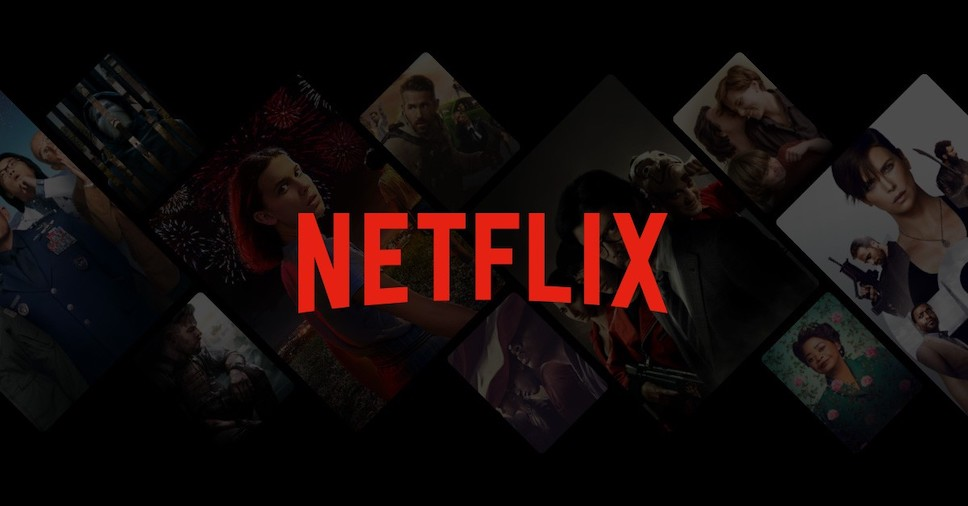

In [19]:
from IPython.display import Image
Image(filename="C:/Users/julik/Downloads/N_image.jpg", width = 1170 , height = 400)

# **Netflix Recommendation Engine**

Netflix's recommendation engine is a sophisticated system designed to suggest movies and TV shows tailored to individual user preferences. It primarily uses collaborative filtering and content-based filtering to analyze viewing history, ratings, and user behavior. By delving into patterns across millions of users, it identifies similar content and predicts what a user might enjoy next. Additionally, Netflix employs a hybrid approach, incorporating factors like viewing time, genre preferences, and even time of day to refine its suggestions, ultimately enhancing user satisfaction and engagement.

In [20]:
import pandas as pd  #data manipulation
import numpy as np  #numerical python
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual

**#Load the dataset**

In [21]:
# Reading dataset file
netflix_dataset = pd.read_csv('file:///C:/Users/julik/Downloads/combined_data_1.txt/combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [22]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [23]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [24]:
netflix_dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [25]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]
movie_count

4499

In [26]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [27]:
customer_count - movie_count

470758

In [28]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

In [29]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [30]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


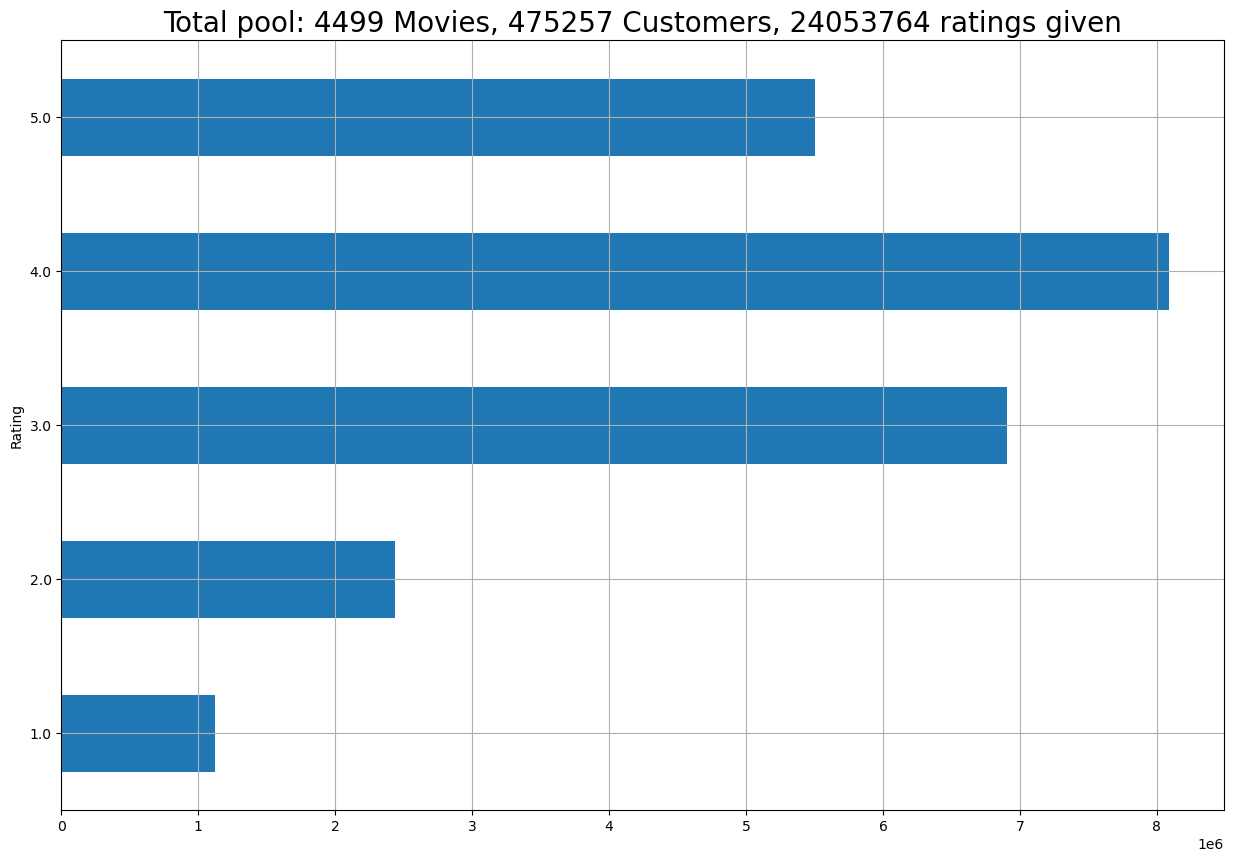

In [31]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [32]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [33]:
movie_id=None
movie_np =[]
# Iterate over the DataFrame rows
for cust_id in netflix_dataset['Cust_Id']:
    if ':' in cust_id:
        # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)



This code iterates through the `Cust_Id` column of a DataFrame called `netflix_dataset`. Here’s a breakdown:

1. **Initialization**: `movie_id` is set to `None`, and `movie_np` is initialized as an empty list to store movie IDs.
  
2. **Iteration**: The loop goes through each `cust_id` in the `Cust_Id` column.

3. **Condition Check**: If a colon (`:`) is found in `cust_id`, it indicates that this value contains a movie ID.

4. **Updating `movie_id`**: The code replaces the colon with an empty string, converts the result to an integer, and assigns it to `movie_id`.

5. **Appending to List**: Regardless of the condition, `movie_id` (which may still be `None` if no colon was found) is appended to the `movie_np` list.

In summary, this code collects movie IDs from a customer ID column, converting and storing them in a list when a valid ID is detected. If no valid ID is found, `None` values will be stored in `movie_np`.

In [34]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [35]:
# Add the new column to the DataFrame
netflix_dataset['Movie_Id'] = movie_np



In [36]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [37]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)

<ipython-input-26-3979ed240fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
#pre-filtering
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers


In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [ ]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
len(drop_movie_list)

2699

In [ ]:
4499-2699  #movies left

1800

In [ ]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [ ]:
len(drop_cust_list)

282042

In [ ]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


# Model Building

In [4]:
import pandas as pd
df_title = pd.read_csv(r"C:\Users\julik\Downloads\Copy of movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])


In [5]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357231 sha256=387242b006c753e8075a8790aae5ccfc0ec1c1537f4162795772f6a55bb8462d
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Reader,et, Datas SVD
from surprise.model_selection import cross_validate

In [ ]:
reader=Reader()

In [ ]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [ ]:
model=SVD()

In [ ]:
cross_validate(model, data, measures=['RMSE'], cv=3)

{'test_rmse': array([1.02209218, 1.01766262, 1.01918414]),
 'fit_time': (4.192678451538086, 1.3870642185211182, 1.51828932762146),
 'test_time': (0.17510366439819336, 0.19944548606872559, 0.4871492385864258)}

# **Recommendation**

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
df_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [ ]:
user_1331154	=df_title.copy()   #making a copy for each individual customer for the recomendation
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
#LAMBDA EXAMPLE THIS IS NOT PART OF THIS FILE
x=lambda a:a+10
print(x(15))

25


In [ ]:
number=[1,2,3,4,5]
even=list(filter(lambda x:(x%2==0),number))
print(even)

[2, 4]


In [ ]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)

<ipython-input-57-8e621200fbf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.579019
4,5,2004.0,The Rise and Fall of ECW,4.659946
5,6,1997.0,Sick,3.380251
7,8,2004.0,What the #$*! Do We Know!?,3.733056
15,16,1996.0,Screamers,3.562049
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.572303
17766,17767,2004.0,Fidel Castro: American Experience,3.572303
17767,17768,2000.0,Epoch,3.572303
17768,17769,2003.0,The Company,3.572303


In [ ]:
user_1331154.sort_values('Estimate_Score', ascending=False)

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.659946
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.056251
7,8,2004.0,What the #$*! Do We Know!?,3.733056
29,30,2003.0,Something's Gotta Give,3.722206
27,28,2002.0,Lilo and Stitch,3.678342
...,...,...,...,...
17,18,1994.0,Immortal Beloved,3.554898
5,6,1997.0,Sick,3.380251
23,24,1981.0,My Bloody Valentine,3.081189
16,17,2005.0,7 Seconds,2.680973


In [ ]:
top5_movies=user_1331154.sort_values('Estimate_Score', ascending=False).head(5)


In [ ]:
top5_movies

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.659946
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.056251
7,8,2004.0,What the #$*! Do We Know!?,3.733056
29,30,2003.0,Something's Gotta Give,3.722206
27,28,2002.0,Lilo and Stitch,3.678342
